# NMF Practical Work

**Roland Badeau - Notebook code by Umut Simsekli** 

Telecom Paris - TSIA 206

## 1. By following the technique that we used in the lecture, derive the MUR algorithm by yourselves

In [78]:
%matplotlib inline

In [79]:
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms

# and IPython.display for audio output
import IPython.display as ipd

# Librosa for audio
import librosa
# # And the display module for visualization
import librosa.display


/tmp/ipykernel_34143/1529239179.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(np.abs(X)), origin="lower")


<Figure size 640x480 with 0 Axes>

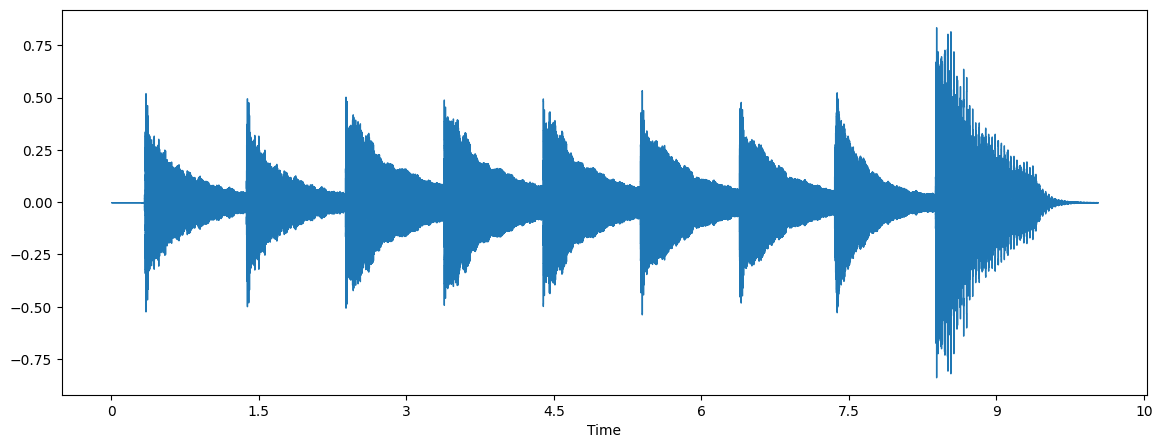

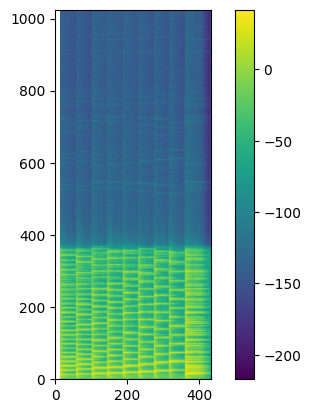

In [80]:
# Audio file
fname = 'Cmajor_piano8khz.wav'

# Load signal
y, sr = librosa.load(fname)

# Compute STFT
Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None)
X = np.abs(Xstft)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

#Visualize the spectrum
plt.figure()
plt.imshow(20*np.log10(np.abs(X)), origin="lower")
plt.colorbar()


## 2. Implement MUR for NMF with beta-divergence 

In [100]:
def MUR(X, K, beta, number_inter):
    
    I, J = X.shape

    W = np.abs(np.random.normal(size=(I, K))) + 0.1
    H = np.abs(np.random.normal(size=(K, J))) + 0.1

    W_final = W.copy()
    H_final = H.copy()

    norm = []
    iter = 0
    norm_matrix = np.linalg.norm(X - W @ H) 

    while iter < number_inter:

        X_hat = W @ H
        
        W_final = W.copy()
        H_final = H.copy()

        W *= ((X * X_hat**(beta - 2)) @ H.T + 0.1) / (X_hat**(beta - 1) @ H.T + 0.1)
        H *= (W.T @ (X * X_hat**(beta - 2) + 0.1)) / (W.T @ X_hat**(beta - 1) + 0.1) 
        
        W /= np.sum(W, axis=0, keepdims=True)
        H *= np.sum(W, axis=0, keepdims=True).T

        result = W @ H
        norm_matrix = np.linalg.norm(X - result)

        if iter % 10 == 0:
            print(f"The distance between the real matrix and W @ H is {norm_matrix}")
            
        norm.append(norm_matrix)
        
        iter += 1
        
    return W_final, H_final, norm

## 3. Experiment with the algorithm parameters, such as $\beta$, number of columns in $W$, STFT window size, hop size, etc. 

The distance between the real matrix and W @ H is 1825.6221129507178
The distance between the real matrix and W @ H is 270.4586812618348
The distance between the real matrix and W @ H is 151.2810113945386
The distance between the real matrix and W @ H is 108.19307641757041
The distance between the real matrix and W @ H is 86.07061827383713
The distance between the real matrix and W @ H is 72.31210755564345
The distance between the real matrix and W @ H is 62.749957089794705
The distance between the real matrix and W @ H is 55.643185063945154
The distance between the real matrix and W @ H is 50.142081032730665
The distance between the real matrix and W @ H is 45.75684643113448
The distance between the real matrix and W @ H is 42.177889114831494
The distance between the real matrix and W @ H is 39.202146282995656
The distance between the real matrix and W @ H is 36.69188767891383
The distance between the real matrix and W @ H is 34.54309128830009
The distance between the real matrix and 

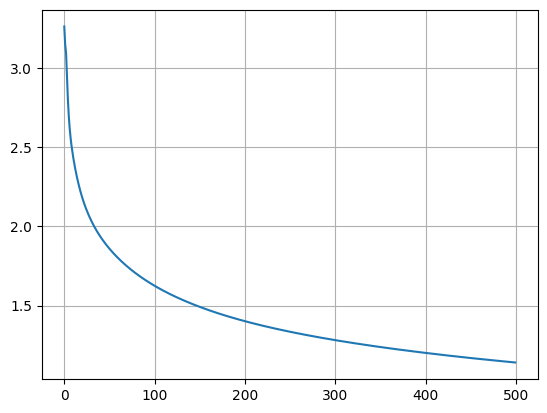

In [109]:
W, H, norms = MUR(X, 1000, beta=2, number_inter= 500)
plt.plot(np.log10(norms))
plt.grid()
plt.show()

/tmp/ipykernel_34143/3935382946.py:5: RuntimeWarning: divide by zero encountered in log10
  ax[0].imshow(20*np.log10(np.abs(W)), origin= "lower")
/tmp/ipykernel_34143/3935382946.py:7: RuntimeWarning: divide by zero encountered in log10
  ax[2].imshow(20*np.log10(np.abs(X)), origin = "lower")


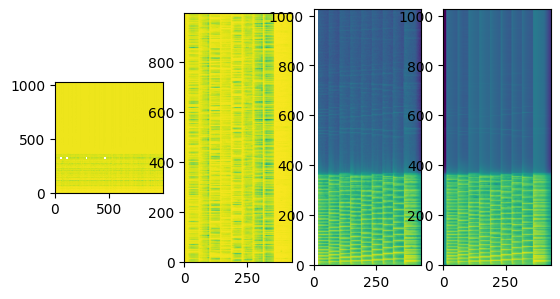

In [112]:
fig, ax = plt.subplots(nrows = 1, ncols= 4)

X_reconstruct = W @ H

ax[0].imshow(20*np.log10(np.abs(W)), origin= "lower")
ax[1].imshow(20*np.log10(np.abs(H)), origin = "lower")
ax[2].imshow(20*np.log10(np.abs(X)), origin = "lower")
ax[3].imshow(20*np.log10(np.abs(X_reconstruct)), origin = "lower")
plt.show()

In [113]:
signal = librosa.istft(X_reconstruct)
ipd.Audio(signal, rate=sr)

In [108]:
# Example reconstruction
y_hat = librosa.istft(X)
ipd.Audio(y_hat, rate=sr)
